In [7]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings

In [8]:
base = pd.read_csv('AirPassengers.csv')
dataparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],
                  index_col = 'Month', date_parser = dataparse)
ts = base['#Passengers']

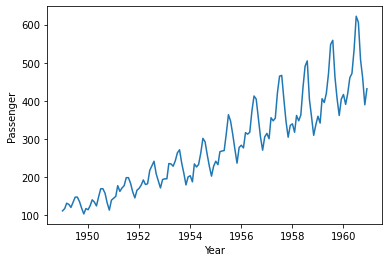

In [9]:
plt.plot(ts)
plt.xlabel('Year')
plt.ylabel('Passenger')
plt.show()

In [17]:
#Criação do modelo ARIMA com os parametros p = 2, q = 1, d = 2, treinamento e visualização dos resultados
modelo = ARIMA(ts, order=(2,1,2), freq=ts.index.inferred_freq)
modelo_treinado = modelo.fit()
warnings.filterwarnings("ignore")
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.712
Date:                Tue, 14 Sep 2021   AIC                           1344.043
Time:                        18:15:39   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5308      0.708      3.573      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.934      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.881      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9100      0.065    -29.498      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9998      0.068     14.796      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9551           -0.2964j            1.0001           -0.0479
MA.2            0.9551           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

In [11]:
#previsoes de 12 datas no futuro
previsoes = modelo_treinado.forecast(steps = 12)[0]
previsoes

array([433.10525519, 450.86283301, 479.77943838, 511.93928558,
       539.29502048, 555.78552262, 558.74207128, 549.27937323,
       531.66109334, 511.89882687, 496.0205907 , 488.4918861 ])

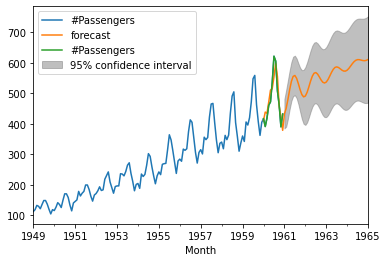

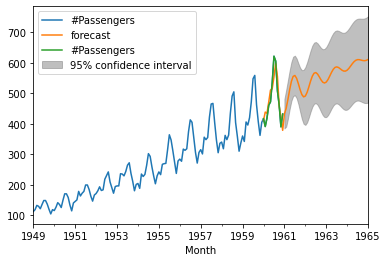

In [12]:
# criação de eixo para série temporal completa, com adição das previsões do modelo
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01', '1965-01-01',
                            ax = eixo, plot_insample = True)

In [13]:
# Implementação do auto arima para descoberta automática dos parâmetros
modelo_auto = auto_arima(ts, m = 12, seasonal = True, trace = False)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Tue, 14 Sep 2021   AIC                           1017.847
Time:                                     18:15:24   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.601      0.000      -1.057      -0.907
sigma2       129.3130     14.556      8.884      0.000     100.783     157.843
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
proximos_12 = modelo_auto.predict(n_periods = 12)
# visualização 
proximos_12

array([445.63488087, 420.3949451 , 449.19824485, 491.83985608,
       503.39436987, 566.86232937, 654.26004163, 638.59734162,
       540.88358496, 494.12645479, 423.33253479, 465.50739497])